In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


## Set model and resolution parameters

In [2]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [3]:
ngen = 100000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

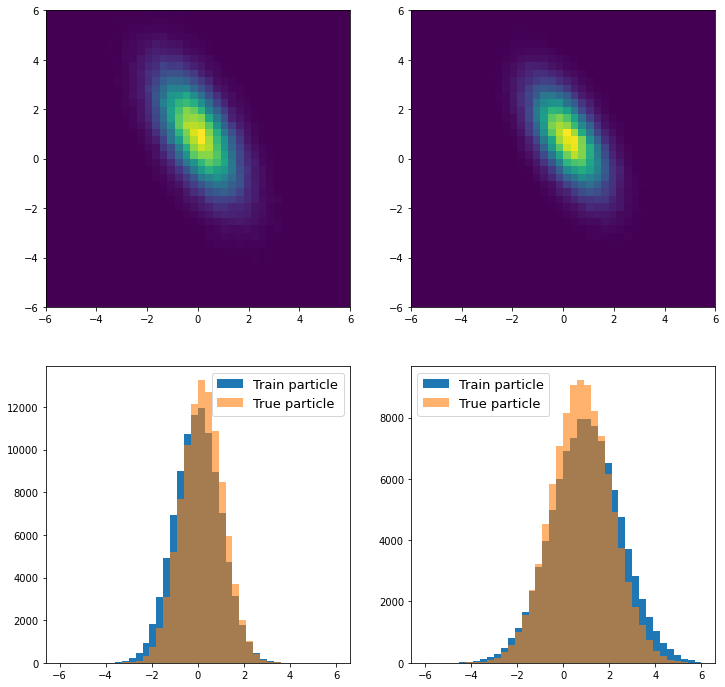

In [4]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [5]:
train_diff = train_det_pts - train_pts

In [6]:
diff_cov = np.cov( train_diff.T )

In [7]:
diff_cov

array([[ 2.52218199e-01, -5.44129680e-04],
       [-5.44129680e-04,  6.42295250e-01]])

In [8]:
np.sqrt(diff_cov[0,0])

0.5022133003246023

In [9]:
np.sqrt(diff_cov[1,1])

0.8014332472388124

<function matplotlib.pyplot.show(close=None, block=None)>

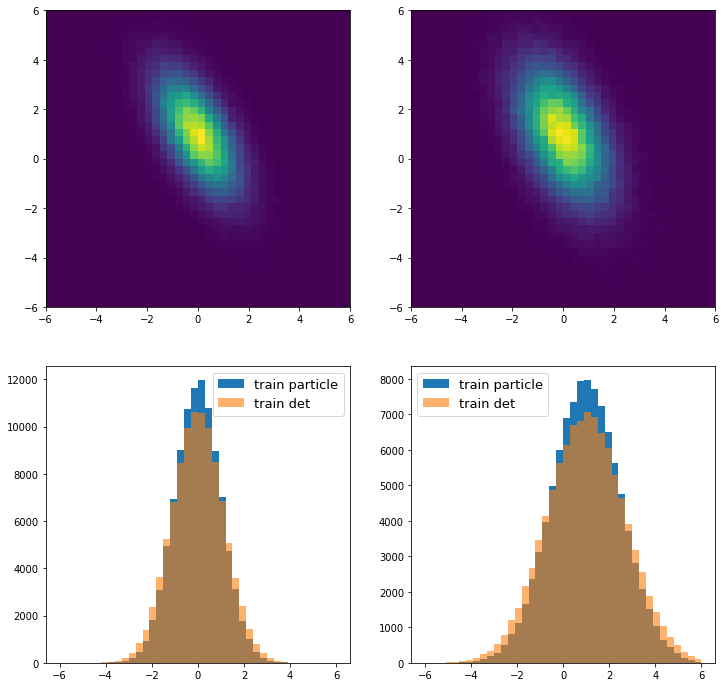

In [10]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

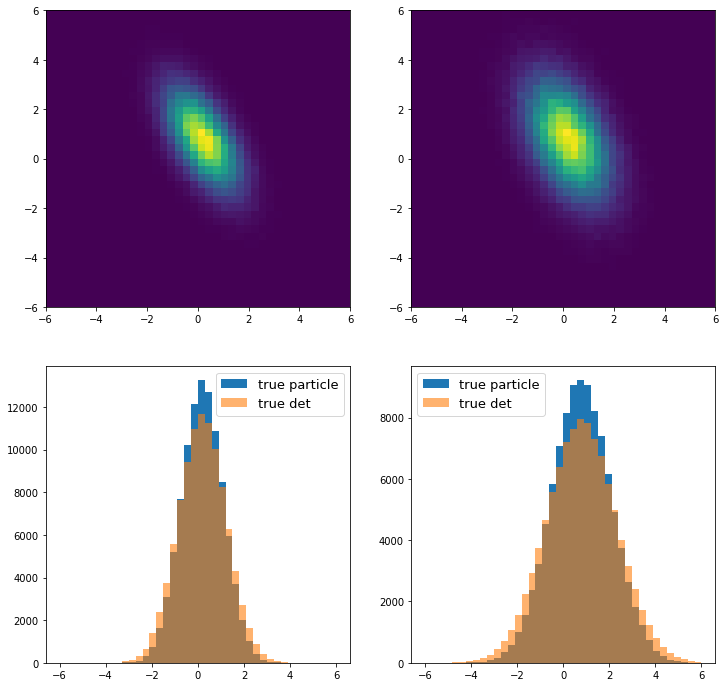

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

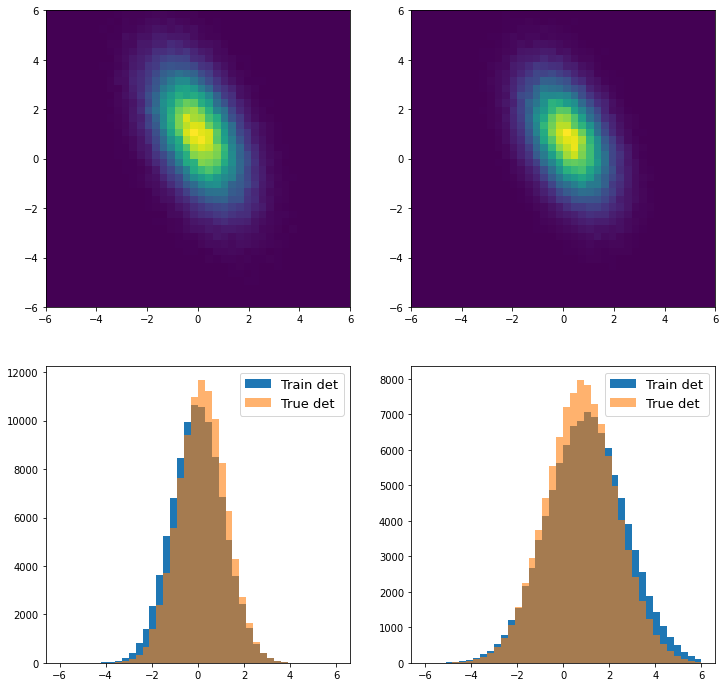

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [13]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

## Package the training data for OmniFold

In [14]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [15]:
of_weights = of.omnifold( train_both, true_det_pts, 4, model)

/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [16]:
of_weights

array([[[0.77857065, 0.75829864, 1.12468421, ..., 0.6261726 ,
         1.2546885 , 0.74678874],
        [0.72614193, 0.79798388, 1.16505075, ..., 0.6817162 ,
         1.1778034 , 1.03035462]],

       [[0.71952015, 0.78817308, 1.21573412, ..., 0.45967886,
         1.33112621, 1.01668799],
        [0.72308439, 0.82235426, 1.20576704, ..., 0.59606028,
         1.27088833, 1.03981233]],

       [[0.72625571, 0.82299197, 1.27634132, ..., 0.47031379,
         1.35989177, 1.04051793],
        [0.7364803 , 0.82209277, 1.26389337, ..., 0.53280711,
         1.35260952, 1.06126738]],

       [[0.73368603, 0.81826049, 1.25493395, ..., 0.44317031,
         1.40885401, 1.05930734],
        [0.70640874, 0.81239527, 1.25716591, ..., 0.43926775,
         1.34394217, 1.03455412]]])

In [17]:
np.shape( of_weights)

(4, 2, 100000)

<function matplotlib.pyplot.show(close=None, block=None)>

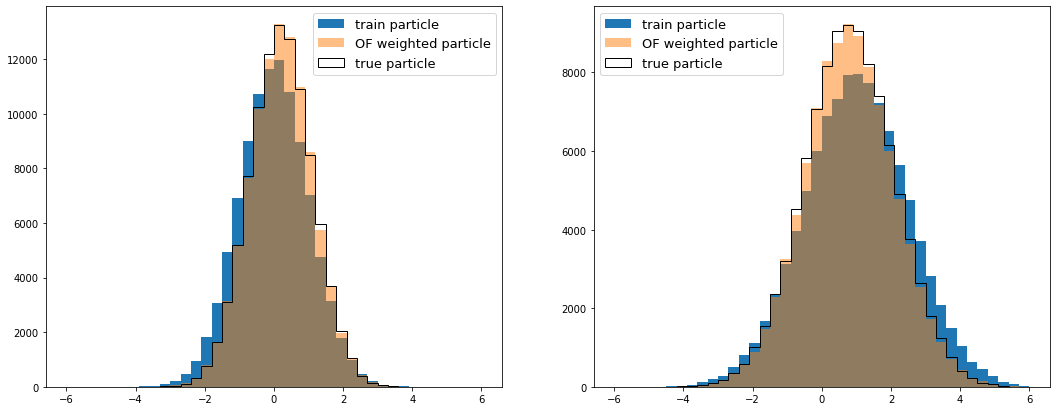

In [32]:
fig,ax = plt.subplots( 1, 2, figsize=(18,7))

hmin=-6
hmax=6
hbins=40



ax[0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[0].hist( train_pts[:,0], weights=of_weights[3,0,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
ax[0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )

ax[1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1].hist( train_pts[:,1], weights=of_weights[3,1,:], bins=hbins, range=[hmin,hmax], label='OF weighted particle', alpha=0.5 )
ax[1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle', histtype='step', color='black' )


ax[0].legend(loc='best', fontsize=13)
ax[1].legend(loc='best', fontsize=13)



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

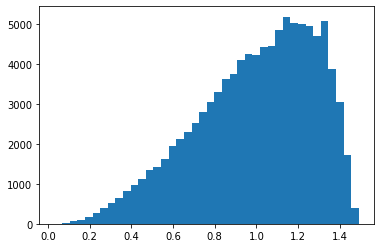

In [37]:
plt.hist( of_weights[3,0,:], bins=40)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

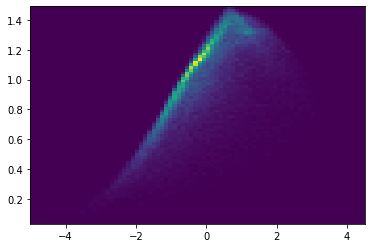

In [39]:
plt.hist2d( train_pts[:,0], of_weights[3,0,:], bins=[80,80])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

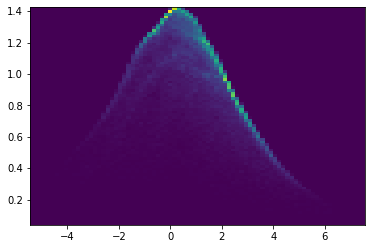

In [41]:
plt.hist2d( train_pts[:,1], of_weights[3,1,:], bins=[80,80])
plt.show